In [1]:
#please mention the problem statement and expected solution.

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the dataset 
original_data=pd.read_csv("component_failure_prediction.csv")
df=original_data.copy()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
# product ID and UDI are the identification no. not significant, we can drop them
df1=df.drop(["UDI","Product ID"],axis=1)

In [7]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
# lets rename the columns
df1=df1.rename(mapper={"Air temperature [K]":"Air Temperature","Process temperature [K]":"Process temperature","Rotational speed [rpm]":"Rotational speed","Torque [Nm]":"Torque","Tool wear [min]":"Tool wear"},axis=1)

In [9]:
df1.head()

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [10]:
# lets see the different failure type
df1["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [11]:
df1["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [12]:
df1["Target"].value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [13]:
# the dataset is indeed very imbanalced.

In [14]:
df1.isnull().sum()

Type                   0
Air Temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Target                 0
Failure Type           0
dtype: int64

In [15]:
df1["Type"].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [16]:
# we are finding difference in Number of NO failure in two dependent variable lets examine it.
df_failure=df1[df1["Target"]==1]
df_failure["Failure Type"].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [17]:
# observation:- 9 values are identified as failure in the Target column 
#but No failure in Failure type column

In [18]:
df_failure[df_failure["Failure Type"]=="No Failure"]

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [19]:
# we need to drop the above observations /rows so we are finding the row number by using the index
index_possible_failure=df_failure[df_failure["Failure Type"]=="No Failure"].index
df1.drop(index_possible_failure,axis=0,inplace=True)# here we are using axis=0 because we have to drop rows

In [20]:
df_failure=df1[df1["Target"]==0]
df_failure["Failure Type"].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [21]:
df_failure[df_failure["Failure Type"]=="Random Failures"]

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [22]:
# we have 18 observations which classified as No failure in Target Column , 
#but Identified as Random Failure in Failure Type column.

In [23]:
# to avoide the confusion we should drop these rows

In [24]:
# we need to drop the above observations /rows so we are finding the row number by using the index
index_possible_failure=df_failure[df_failure["Failure Type"]=="Random Failures"].index
df1.drop(index_possible_failure,axis=0,inplace=True)# here we are using axis=0 because we have to drop rows

In [25]:
df1.shape[0]

9973

In [26]:
df1.head()

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [27]:
#EDA 

In [28]:
#Pairplot correlation

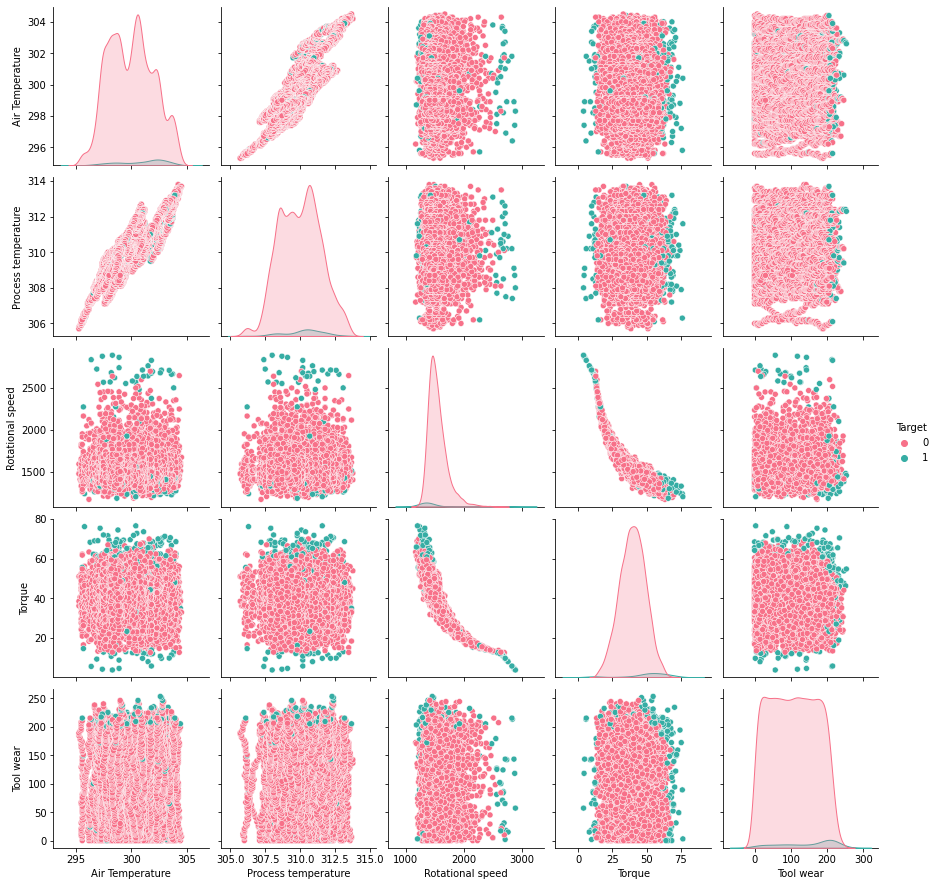

In [29]:
sns.pairplot(df1,hue="Target",palette="husl")

In [30]:
""" Torque and Rotational speed are highly correlated. Linear but negative.
Process temp and Air Temp highly positive linear relation.
Failure occur at extreme high & extreme low value of Torque and rotational speed
"""

' Torque and Rotational speed are highly correlated. Linear but negative.\nProcess temp and Air Temp highly positive linear relation.\nFailure occur at extreme high & extreme low value of Torque and rotational speed\n'

In [31]:
# please do plot violinplot and histogram also 

In [32]:
df1["Target"].value_counts(normalize=True)

0    0.966911
1    0.033089
Name: Target, dtype: float64

In [33]:
# percentage of failure in pie plot

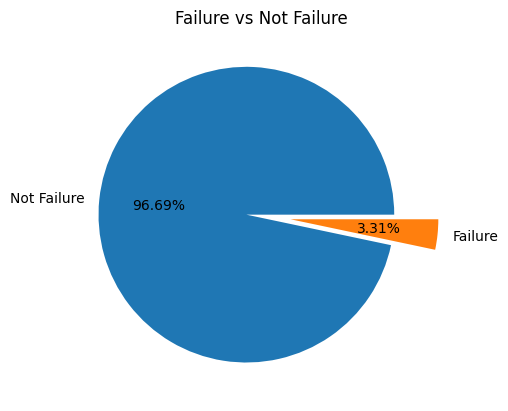

In [34]:
plt.pie(df1["Target"].value_counts(),explode=[0.1,0.2],labels=["Not Failure","Failure"],autopct="%1.2f%%")
plt.title("Failure vs Not Failure")
plt.show()

In [35]:
# collelation matrix heatmap

<AxesSubplot:>

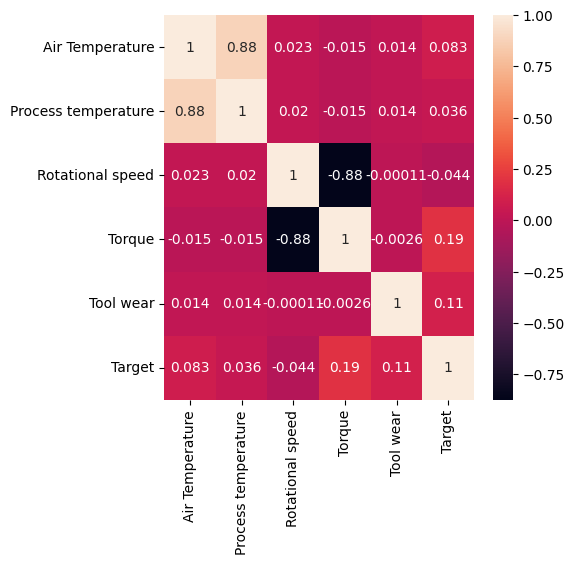

In [36]:
plt.figure(figsize=(5,5))
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:xlabel='Target', ylabel='Torque'>

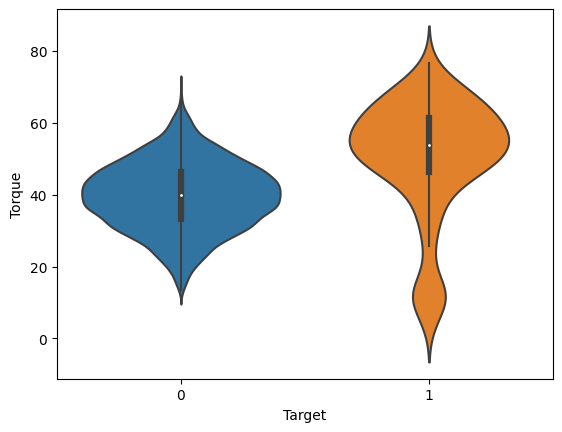

In [37]:
# violin plot
sns.violinplot(data=df1,x="Target",y="Torque")

<AxesSubplot:xlabel='Target', ylabel='Rotational speed'>

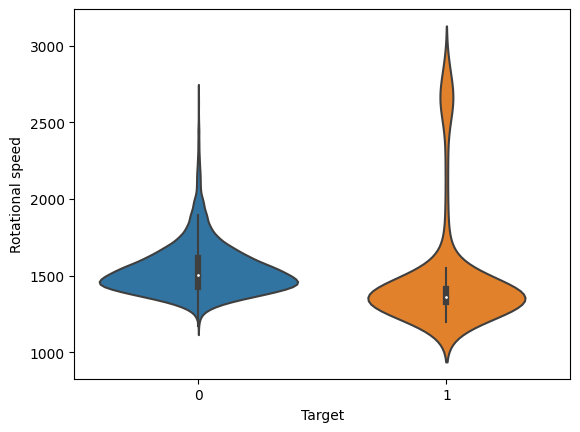

In [38]:
sns.violinplot(data=df1,x="Target",y="Rotational speed")

In [39]:
# three quality product type L,M,H  supply

Text(0.5, 1.0, 'Product quality type supply')

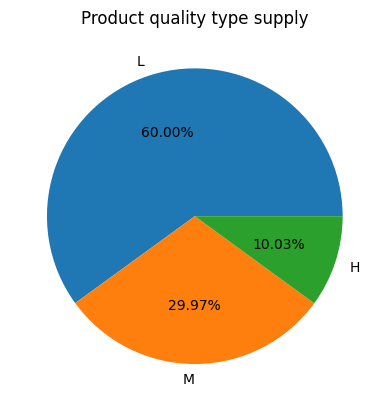

In [40]:
plt.pie(df["Type"].value_counts(),labels=["L","M","H"],autopct="%1.2f%%")
plt.title("Product quality type supply")

In [41]:
#percentage of product failure wrt quality type

Text(0.5, 1.0, 'performance of Quality L product')

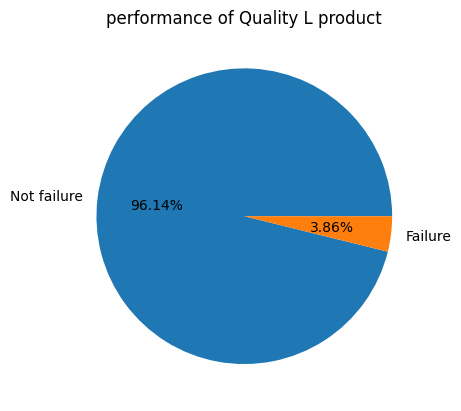

In [42]:
df_product_quality=df1[df1["Type"]=="L"]
plt.pie(df_product_quality["Target"].value_counts(),labels=["Not failure","Failure"],autopct="%1.2f%%")
plt.title("performance of Quality L product")

Text(0.5, 1.0, 'performance of Quality M product')

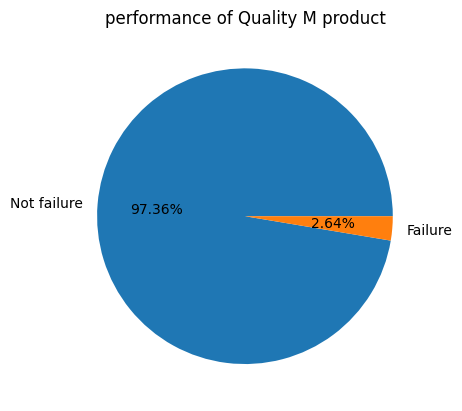

In [43]:
df_product_quality=df1[df1["Type"]=="M"]
plt.pie(df_product_quality["Target"].value_counts(),labels=["Not failure","Failure"],autopct="%1.2f%%")
plt.title("performance of Quality M product")

Text(0.5, 1.0, 'performance of Quality H product')

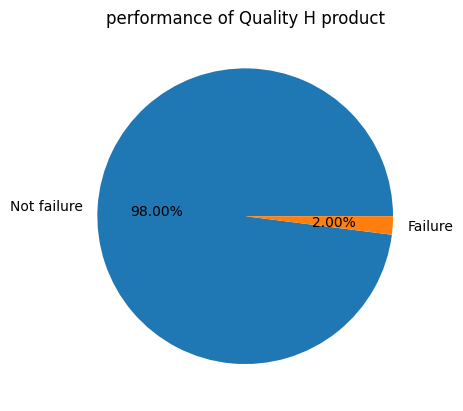

In [44]:
df_product_quality=df1[df1["Type"]=="H"]
plt.pie(df_product_quality["Target"].value_counts(),labels=["Not failure","Failure"],autopct="%1.2f%%")
plt.title("performance of Quality H product")

In [45]:
# The difference in failure margin among Quality L , M, H  Is just around 1 to 1.5 %

In [46]:
df1.head()

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [47]:
df1["Failure Type"].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

In [48]:
df1["Failure Type"].value_counts(normalize=True)

No Failure                  0.966911
Heat Dissipation Failure    0.011230
Power Failure               0.009526
Overstrain Failure          0.007821
Tool Wear Failure           0.004512
Name: Failure Type, dtype: float64

In [49]:
# we can draw a pie plot for different failure type 

Text(0.5, 1.0, 'Failure percentage as per failure type')

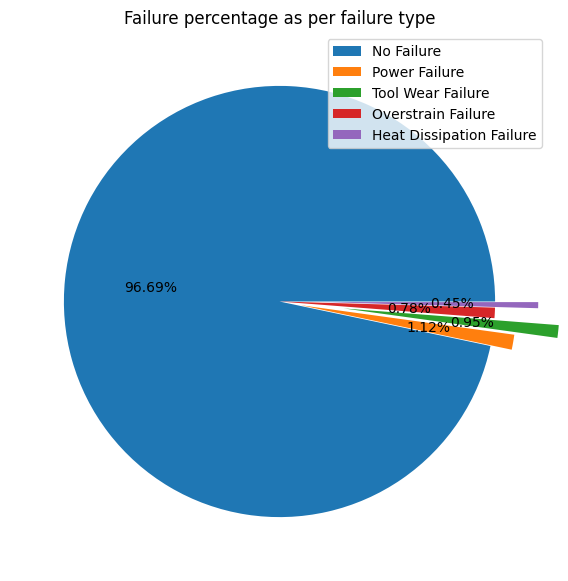

In [50]:
plt.figure(figsize=(7,7))
failure_type=df1["Failure Type"].unique().tolist()# different types of failure
plt.pie(df1["Failure Type"].value_counts(),autopct="%1.2f%%",explode=(0.00,0.1,0.3,0.0,0.2))
plt.legend(failure_type)
plt.title("Failure percentage as per failure type")


In [51]:
# lets examine the effect of Rotational speed and torque on the failure types

In [52]:
# scatter plot 

<AxesSubplot:xlabel='Rotational speed', ylabel='Torque'>

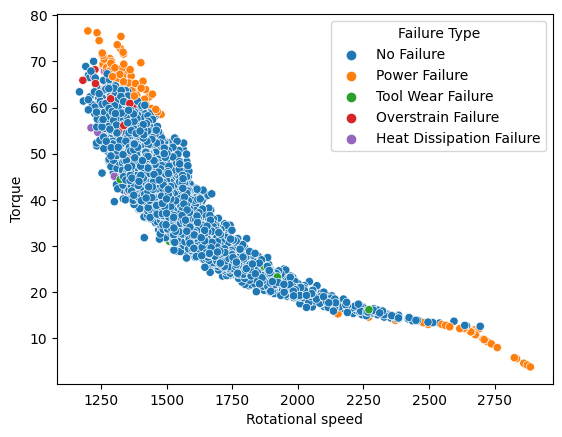

In [53]:
sns.scatterplot(data=df1,x="Rotational speed",y="Torque",hue="Failure Type")

<AxesSubplot:xlabel='Rotational speed', ylabel='Torque'>

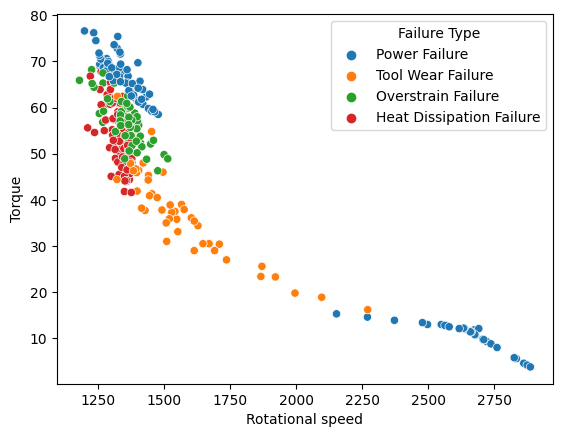

In [54]:
sns.scatterplot(data=df1[df1["Target"]==1],x="Rotational speed",y="Torque",hue="Failure Type")

In [55]:
#please must write your observation and find some scientific relationship also

In [56]:
# to find the skewness,outliers,please draw histogram, boxplot

In [57]:
df1.head()

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [58]:
# lets do label encoding

In [59]:
df1["Failure Type"].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

In [60]:
df1["Failure Type"]=df1["Failure Type"].map({"No Failure":0,"Heat Dissipation Failure":1,"Power Failure":2,"Overstrain Failure":3,"Tool Wear Failure":4})

In [61]:
df1.head()

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0
2,L,298.1,308.5,1498,49.4,5,0,0
3,L,298.2,308.6,1433,39.5,7,0,0
4,L,298.2,308.7,1408,40.0,9,0,0


In [62]:
df1["Type"]=df1["Type"].map({"L":0,"M":1,"H":2})

In [63]:
df1.head()

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0
2,0,298.1,308.5,1498,49.4,5,0,0
3,0,298.2,308.6,1433,39.5,7,0,0
4,0,298.2,308.7,1408,40.0,9,0,0


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 9973 non-null   int64  
 1   Air Temperature      9973 non-null   float64
 2   Process temperature  9973 non-null   float64
 3   Rotational speed     9973 non-null   int64  
 4   Torque               9973 non-null   float64
 5   Tool wear            9973 non-null   int64  
 6   Target               9973 non-null   int64  
 7   Failure Type         9973 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 959.3 KB


In [65]:
# MODEL BUILDING PROCESS
# splitting in dependent and independent variable

In [66]:
X=df1.drop(["Target","Failure Type"],axis=1)
X.head()

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9


In [67]:
# SCALING
# As there are extreme outlier we can use Robust Outlier or Min Max scaler
from sklearn.preprocessing import MinMaxScaler,RobustScaler
scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear
0,1.0,-0.62500,-0.652174,0.253968,0.200000,-0.990826
1,0.0,-0.59375,-0.608696,-0.502646,0.459259,-0.963303
2,0.0,-0.62500,-0.695652,-0.026455,0.688889,-0.944954
3,0.0,-0.59375,-0.652174,-0.370370,-0.044444,-0.926606
4,0.0,-0.59375,-0.608696,-0.502646,-0.007407,-0.908257


In [68]:
# we have two dependent variable in this dataset
# lets start the model building with Target variable

In [69]:
Y=df1["Target"]

In [70]:
# import the algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [71]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()
svc=SVC()
knn=KNeighborsClassifier()

In [72]:
#StratifiedShuffleSplit is a combination of both ShuffleSplit and StratifiedKFold. 
#Using StratifiedShuffleSplit  the data is shuffled each time before the split is done.

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_val_predict,cross_validate

In [74]:
for model in[rf,bg,svc,dt,knn]:
    print("======="*5)
    print("Performance of",model)
    print("======="*5)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=50)
    scoring=["roc_auc","f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,X_scaled,Y,scoring=scoring,cv=cv)
    roc_auc_test_cv=round(cross_val_scores["test_roc_auc"].mean(),4)
    f1_test_cv=round(cross_val_scores["test_f1_macro"].mean(),4)
    precisio_test_cv=round(cross_val_scores["test_precision_macro"].mean(),4)
    Recall_test_cv=round(cross_val_scores["test_recall_macro"].mean(),4)
    
    # print of metrics
    print("ROC AUC",roc_auc_test_cv) 
    print("F1 MACRO",f1_test_cv) 
    print("PRECISION MACRO",precisio_test_cv) 
    print("RECALL MACRO",Recall_test_cv) 
    
    

Performance of RandomForestClassifier()
ROC AUC 0.978
F1 MACRO 0.8585
PRECISION MACRO 0.9399
RECALL MACRO 0.8047
Performance of BaggingClassifier()
ROC AUC 0.9488
F1 MACRO 0.8734
PRECISION MACRO 0.9287
RECALL MACRO 0.8326
Performance of SVC()
ROC AUC 0.961
F1 MACRO 0.6717
PRECISION MACRO 0.9093
RECALL MACRO 0.6131
Performance of DecisionTreeClassifier()
ROC AUC 0.8478
F1 MACRO 0.8466
PRECISION MACRO 0.8471
RECALL MACRO 0.8478
Performance of KNeighborsClassifier()
ROC AUC 0.8559
F1 MACRO 0.7352
PRECISION MACRO 0.8985
RECALL MACRO 0.6704


In [75]:
for model in[rf,bg,svc,dt,knn]:
    print("======="*5)
    print("Performance of",model)
    print("======="*5)
    #cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=50)
    scoring=["roc_auc","f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,X_scaled,Y,scoring=scoring,cv=10)
    roc_auc_test_cv=round(cross_val_scores["test_roc_auc"].mean(),4)
    f1_test_cv=round(cross_val_scores["test_f1_macro"].mean(),4)
    precisio_test_cv=round(cross_val_scores["test_precision_macro"].mean(),4)
    Recall_test_cv=round(cross_val_scores["test_recall_macro"].mean(),4)
    
    # print of metrics
    print("ROC AUC",roc_auc_test_cv) 
    print("F1 MACRO",f1_test_cv) 
    print("PRECISION MACRO",precisio_test_cv) 
    print("RECALL MACRO",Recall_test_cv) 
    
    

Performance of RandomForestClassifier()
ROC AUC 0.9517
F1 MACRO 0.7979
PRECISION MACRO 0.9003
RECALL MACRO 0.7534
Performance of BaggingClassifier()
ROC AUC 0.9166
F1 MACRO 0.8122
PRECISION MACRO 0.8809
RECALL MACRO 0.7785
Performance of SVC()
ROC AUC 0.9482
F1 MACRO 0.6801
PRECISION MACRO 0.8909
RECALL MACRO 0.6272
Performance of DecisionTreeClassifier()
ROC AUC 0.791
F1 MACRO 0.7681
PRECISION MACRO 0.7766
RECALL MACRO 0.791
Performance of KNeighborsClassifier()
ROC AUC 0.8162
F1 MACRO 0.6986
PRECISION MACRO 0.8307
RECALL MACRO 0.6486


In [76]:
"""
All results are using cross validation:

Bagging is the best overall model, with highest f1 score and second highest roc auc.
Random Forest has a slightly highest roc auc than Balanced Bagging, 
but its f1 score is lower.
"""

'\nAll results are using cross validation:\n\nBagging is the best overall model, with highest f1 score and second highest roc auc.\nRandom Forest has a slightly highest roc auc than Balanced Bagging, \nbut its f1 score is lower.\n'

In [77]:
# lets try Train test split approach

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,train_size=0.80,stratify=Y,random_state=110)

In [96]:
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)

In [97]:
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.83      0.59      0.69        66

    accuracy                           0.98      1995
   macro avg       0.91      0.79      0.84      1995
weighted avg       0.98      0.98      0.98      1995



In [ ]:
#hello

In [ ]:
# verify stratified split

In [98]:
print('Checking the stratified split...')
print('Target proportion in original dataset:')
print(df['Target'].value_counts(normalize=True))

print('Target proportion in y_train dataset:')
print(Y_train.value_counts(normalize=True))

print('Target proportion in y_test dataset:')
print(Y_test.value_counts(normalize=True))

Checking the stratified split...
Target proportion in original dataset:
0    0.9661
1    0.0339
Name: Target, dtype: float64
Target proportion in y_train dataset:
0    0.966909
1    0.033091
Name: Target, dtype: float64
Target proportion in y_test dataset:
0    0.966917
1    0.033083
Name: Target, dtype: float64


In [91]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

for model in[rf,bg,svc,dt,knn]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    AS=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    ROC=roc_auc_score(Y_test,y_pred)
    PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
    # print of metrics
    print("confusion matrix \n",cm) 
    print("======="*3)
    print("Accuracy \n",AS) 
    print("======="*3)
    print("Classification Report \n",CR) 
    print("======="*3)
    print("ROC_AUC \n",ROC) 
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS) 
   

Performance of RandomForestClassifier()
confusion matrix 
 [[1922    7]
 [  24   42]]
Accuracy 
 0.9844611528822055
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.86      0.64      0.73        66

    accuracy                           0.98      1995
   macro avg       0.92      0.82      0.86      1995
weighted avg       0.98      0.98      0.98      1995

ROC_AUC 
 0.8163674065695838
MACRO Precision_recall_F1 
 (0.9224049331963, 0.8163674065695838, 0.8612173913043478, None)
Performance of BaggingClassifier()
confusion matrix 
 [[1918   11]
 [  24   42]]
Accuracy 
 0.9824561403508771
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.79      0.64      0.71        66

    accuracy                           0.98      1995
   macro avg       0.89      0.82      0.85      1995
weigh

In [ ]:
# balancing the data

In [93]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss, ClusterCentroids

In [100]:
smote = SMOTE()
adasyn=ADASYN()
over=RandomOverSampler()
border=BorderlineSMOTE()

In [102]:
for model in[rf,bg]:
    print("======="*8)
    print("AFTER data-Balancing Performance:-",model)
    print("======="*8)
    for balancer in[smote,border,adasyn]:
        X_train_1, Y_train_1 = balancer.fit_resample(X_train, Y_train)
        abc=model.fit(X_train_1,Y_train_1)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
        print(model,"using technique:- ",balancer)
        #print("======="*6) 
        print("======="*8) 
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        print("ROC_AUC \n",ROC) 
        print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS)
        print("======="*8)
        print("Conclude one balaning method")
        print("======="*8)
        
        print("======="*8)

AFTER data-Balancing Performance:- RandomForestClassifier()
RandomForestClassifier() using technique:-  SMOTE()
confusion matrix 
 [[1880   49]
 [  15   51]]
Accuracy 
 0.9679197994987468
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1929
           1       0.51      0.77      0.61        66

    accuracy                           0.97      1995
   macro avg       0.75      0.87      0.80      1995
weighted avg       0.98      0.97      0.97      1995

ROC_AUC 
 0.8736627550779961
MACRO Precision_recall_F1 
 (0.751042216358839, 0.8736627550779961, 0.7988607148258305, None)
Conclude one balaning method
RandomForestClassifier() using technique:-  BorderlineSMOTE()
confusion matrix 
 [[1900   29]
 [  16   50]]
Accuracy 
 0.9774436090225563
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.63      0.76     

In [ ]:
# optimization od model

In [103]:
rf.get_params()# it return the default parameters od Random forest

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [104]:
bg.get_params()# it return the default parameters of bagging

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [105]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [106]:
RdFo = RandomForestClassifier(random_state=42, criterion='entropy')
bbc = BaggingClassifier(random_state=42, n_jobs=-1)

In [107]:
grid_param_rf = {'n_estimators': np.arange(10, 160,10),
                       'max_depth': np.arange(10, 110, 10),
                       'min_samples_split': [2, 5, 10]}

In [108]:
random_cv = RandomizedSearchCV(RdFo,grid_param_rf,n_iter=100, cv=3,  n_jobs=-1)

In [109]:
%%time

random_cv.fit(X_train,Y_train)

print("Best params:\n")
print(random_cv.best_params_)

Best params:

{'n_estimators': 90, 'min_samples_split': 2, 'max_depth': 60}
Wall time: 2min 3s


In [110]:
random_cv.best_score_

0.984081018642884

In [ ]:
# bagging optimization

In [111]:
grid_param_bg = {'n_estimators': np.arange(10, 160,10)}

In [112]:
bagging_cv = RandomizedSearchCV(bbc,grid_param_bg,n_iter=100, cv=3,  n_jobs=-1)

In [113]:
%%time

bagging_cv.fit(X_train,Y_train)

print("Best params:\n")
print(bagging_cv.best_params_)

Best params:

{'n_estimators': 20}
Wall time: 30.7 s


In [114]:
bagging_cv.best_score_

0.9865880383546305

In [ ]:
# please paas the best parameter as we received by use of Randomized search CV

In [ ]:
RdFo = RandomForestClassifier(random_state=42, criterion='entropy',n_estimators= 90, min_samples_split= 2, max_depth=60)
bbc = BaggingClassifier(random_state=42, n_jobs=-1)

In [ ]:
#Please do it see the performance on Unbalanced data set and also balanced dataset

In [ ]:
# we  have completed our prediction on binary class target named dependent variable

In [ ]:
# working on multiclass failure type

In [117]:
Y_ftype=df1["Failure Type"]

In [118]:
df1["Failure Type"].value_counts()

0    9643
1     112
2      95
3      78
4      45
Name: Failure Type, dtype: int64

In [119]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_scaled,Y_ftype,train_size=0.80,stratify=Y_ftype,random_state=111)

In [120]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for model in[rf,bg,svc,dt,knn]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train1,Y_train1)
    y_pred1=abc.predict(X_test1)
    cm=confusion_matrix(Y_test1,y_pred1)
    AS=accuracy_score(Y_test1,y_pred1)
    CR=classification_report(Y_test1,y_pred1)
    #ROC=roc_auc_score(Y_test1,y_pred1)
    PRFS=precision_recall_fscore_support(Y_test1,y_pred1, average='macro')
        
    # print of metrics
    print("confusion matrix \n",cm) 
    print("======="*3)
    print("Accuracy \n",AS) 
    print("======="*3)
    print("Classification Report \n",CR) 
    print("======="*3)
    #print("ROC_AUC \n",ROC) 
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS) 
     

Performance of RandomForestClassifier()
confusion matrix 
 [[1928    0    1    0    0]
 [   5   16    0    1    0]
 [   6    0   13    0    0]
 [   5    0    0   11    0]
 [   8    0    0    1    0]]
Accuracy 
 0.9864661654135338
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       1.00      0.73      0.84        22
           2       0.93      0.68      0.79        19
           3       0.85      0.69      0.76        16
           4       0.00      0.00      0.00         9

    accuracy                           0.99      1995
   macro avg       0.75      0.62      0.68      1995
weighted avg       0.98      0.99      0.98      1995

MACRO Precision_recall_F1 
 (0.7524860385516123, 0.6196929700541471, 0.6764326203877913, None)
Performance of BaggingClassifier()
confusion matrix 
 [[1922    1    5    1    0]
 [   0   22    0    0    0]
 [   4    0   15    0    0]
 [   7    0    0    9   

In [ ]:
#after balalncing performance

In [121]:
for model in[rf,bg,dt]:
    print("======="*8)
    print("AFTER data-Balancing Performance:-",model)
    print("======="*8)
    for balancer in[smote,border]:
        X_train_1, Y_train_1 = balancer.fit_resample(X_train1, Y_train1)
        abc=model.fit(X_train_1,Y_train_1)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        #ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
        print(model,"using technique:- ",balancer)
        #print("======="*6) 
        print("======="*8) 
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        #print("ROC_AUC \n",ROC) 
        #print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS)
        print("======="*8)
        print("Conclude one balaning method")
        print("======="*8)
        
        print("======="*8)

AFTER data-Balancing Performance:- RandomForestClassifier()
RandomForestClassifier() using technique:-  SMOTE()
confusion matrix 
 [[1923    0    2    1    3]
 [   0   24   15   16   11]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]
Accuracy 
 0.9759398496240601
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1929
           1       1.00      0.36      0.53        66
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.98      1995
   macro avg       0.40      0.27      0.31      1995
weighted avg       1.00      0.98      0.98      1995

MACRO Precision_recall_F1 
 (0.4, 0.27210518874593526, 0.3063551401869159, None)
Conclude one balaning method
RandomForestClassifier() using technique:-  BorderlineSMOTE()
confusion mat

In [ ]:
# More EDA , some visualization, tunning on DT 
#please complete the project and write the conclusion 
# deadline is Feb_22
# mithilesh@learnbay.co , 8800686128
# pdf and notebook 
